In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [105]:
df = pd.read_csv("../preprocessed_data_Defi-IA-2022-Rain-Frogs/X_all_2016_final_by_day.zip")

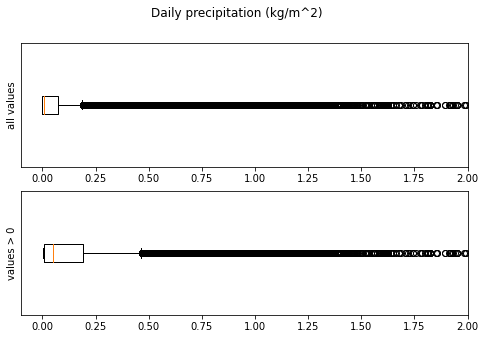

In [108]:
plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.ylabel("all values")
plt.boxplot(x=df["current hour precipitations (kg/m^2)"],vert=False)
plt.xlim([-0.1,2])
plt.yticks([])
plt.subplot(2,1,2)
plt.ylabel("values > 0")
plt.boxplot(x=df[df["current hour precipitations (kg/m^2)"]>0]["current hour precipitations (kg/m^2)"],vert=False)
plt.xlim([-0.1,2])
plt.yticks([])
plt.suptitle("Daily precipitation (kg/m^2)")
plt.savefig("../boxplot_rainfall.jpg")
plt.show()

In [110]:
df = pd.read_csv("../Train/Train/X_station_train.csv")

In [111]:
df.rename(columns={"number_sta" : "station id", "ff" : "wind speed (m/s)", "t" : "temperature (K)",
                   "td" : "dew point (K)", "hu" : "humidity (%)", "dd" : "wind direction (°)",
                   "precip" : "precipiration (kg/m^2)"}, inplace=True)

In [112]:
df = df[["Id","date","station id","temperature (K)","precipiration (kg/m^2)","humidity (%)","dew point (K)","wind speed (m/s)","wind direction (°)"]]

In [113]:
df_nan = df.isna().sum()/len(df)

In [114]:
df_nan

Id                        0.000000
date                      0.000000
station id                0.000000
temperature (K)           0.052390
precipiration (kg/m^2)    0.070371
humidity (%)              0.323367
dew point (K)             0.323928
wind speed (m/s)          0.397058
wind direction (°)        0.397474
dtype: float64

In [115]:
df.head()

,Id,date,station id,temperature (K),precipiration (kg/m^2),humidity (%),dew point (K),wind speed (m/s),wind direction (°)
0,14066001_0_0,2016-01-01 00:00:00,14066001,279.28,0.0,91.4,277.97,3.05,200.0
1,14066001_0_1,2016-01-01 01:00:00,14066001,278.76,0.0,91.4,277.45,2.57,190.0
2,14066001_0_2,2016-01-01 02:00:00,14066001,278.27,0.0,91.7,277.02,2.26,181.0
3,14066001_0_3,2016-01-01 03:00:00,14066001,277.98,0.0,93.0,276.95,2.62,159.0
4,14066001_0_4,2016-01-01 04:00:00,14066001,277.32,0.0,95.9,276.72,2.99,171.0


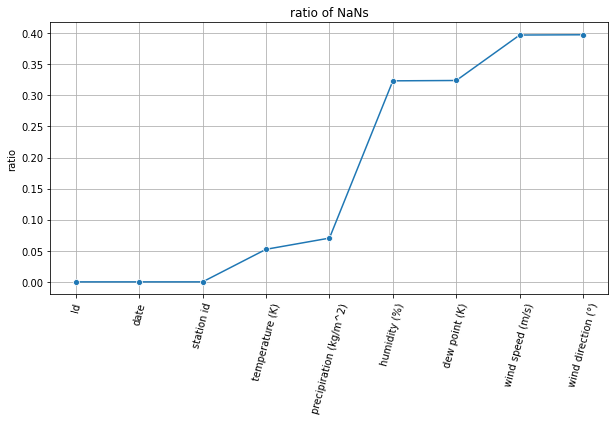

In [116]:
plt.figure(figsize=(10,5))
sns.lineplot(x = np.arange(0,len(df.columns)), y = df_nan, marker="o")
plt.xticks(ticks=np.arange(0,len(df.columns)),
           labels=["Id","date","station id","temperature (K)","precipiration (kg/m^2)","humidity (%)","dew point (K)","wind speed (m/s)","wind direction (°)"],
           rotation=75)
plt.ylabel("ratio")
plt.grid()
plt.title("ratio of NaNs")
plt.savefig("../nans.jpg")
plt.show()